### The Integral Model

Wilson-Cowan-Amari neural field equation:

$$\frac{\partial u(x,t)}{\partial t} = - u(x,t) + \int_{-L}^{L} W(x,y)f(u(y, t)) dy$$

where $u(x,t)$ is the synaptic potential, $W(x,y)$ the synaptic connectivity and $f(u)$ a nonlinear function for the conversion of the synaptic potential into a firing rate. In general, both $W$ and $f$ depend upon control parameters which we will define later.

Inhomogeneous Connectivity Function:

For the synaptic connectivity, a simple way to incorporate an inhomogeneous microstructure is to multiply the homogeneous kernel $w$ by a periodic function $A(y)$ that modulates the synaptic connectivity and thus breaks translational invariance. We choose $A(y)$ to be a simple harmonic function and we pose:

$$ W(x,y) = w(|x-y|)A(y)\\$$ with

$$A(y; a, \epsilon) = 1 + a \space cos(y/ \epsilon) $$

### Choices for the Connectivity Kernel and Firing Rate Function:

The Connectivity Kernel and Firing Rate Function are objects that receive the Parameters on their Constructors and can be evaluated using the evaluateAt() function. i.e: object.evaluateAt(x).

They are defined as:

Connectivity Kernel1: 

$$ W(x;b) = \frac{1}{2} e^{-b|x|}\\$$
Connectivity Kernel2:

$$ W(x; b) = e^{-b|x|}(b \sin{|x|} + \cos{x}) \\$$
Here, $b$ controls the decay of the Synaptic Kernel.

Firing Rate1:

$$ f(u; \mu, \theta) = \frac{1}{1+exp(-\mu(u-\theta))} \\$$
Firing Rate2:

$$ f(u; \mu, \theta) = \frac{1}{1+e^{-\mu u + \theta}} - \frac{1}{1+e^\theta}\\$$
Here, $\mu$ controls the slope of the sigmoidal firing rate, and $\theta$ is a threshold value.

In [1]:
from math import *
import numpy as np
from scipy.integrate import ode
from scipy.fftpack import fft
import FiringRate as fr
import ConnectivityKernel as ck
import NeuralFieldFFT as nf
import matplotlib.pyplot as pt
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

In [2]:
# Spatial Grid
nx = (2**10)-1 # Number of points in the space grid
Lx = 30 # Space grid limits
hx = 2*Lx/nx # Space width between points in the grid 
x = np.linspace(-Lx, Lx-hx, nx) # nx equally spaced points between -Lx and Lx-hx

In [3]:
# Initialize Connectivity Kernel
b=1
kernel = ck.ConnectivityKernel1(b)

Plot the Chosen Connectivity Kernel:

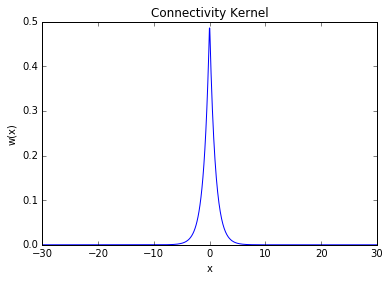

In [4]:
plot_kernel = True
if(plot_kernel):
    fig = pt.figure()
    ax1 = fig.add_subplot(111)
    ax1.plot(x, kernel(x))
    ax1.set_title('Connectivity Kernel')
    ax1.set_xlabel('x')
    ax1.set_ylabel('w(x)')

In [5]:
# Heterogenous Vector
_a = .30
_epsilon = 1
A_vec = (1 + _a*np.cos(x/_epsilon))

In [6]:
# FFT of Synaptic Kernel
W = kernel(x)
W_hat = np.real(fft(W))

In [7]:
# Initialize Firing Rate
mu = 50
theta = 0.5
f_rate = fr.FiringRate1(mu, theta)

# Initialize Neural Field
neural_field = nf.NeuralFieldFFT(f_rate, W_hat, Lx, nx, A_vec)

Use Standard ODE Solvers

In [8]:
#Initial Conditions
A0 = 10; alpha = 0.1 # Parameters of Initial Conditions Function
initCond = lambda x_vec: A0/(np.cosh(alpha*x_vec)**2)
u0 = initCond(x)

In [9]:
# Time step using RungeKutta45
method = ode(neural_field).set_integrator("dopri5")
method.set_initial_value(u0)
final_t = 100
dt = 0.1
sol = []
while method.t < final_t:
    next_u = method.integrate(method.t+dt)
    sol.append(next_u)

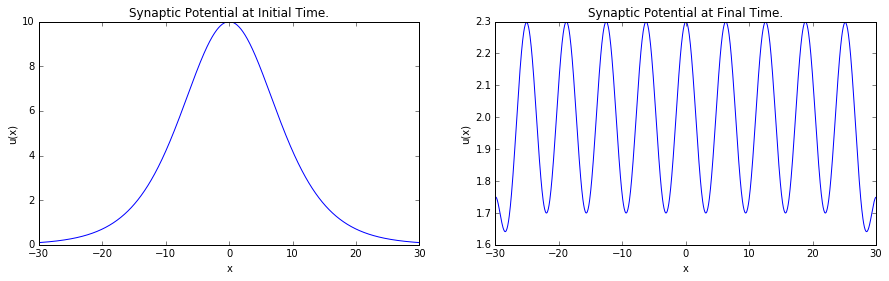

In [10]:
#Plot
fig = pt.figure(figsize=(15,4))

ax1 = fig.add_subplot(121)
ax1.plot(x, u0)
ax1.set_title('Synaptic Potential at Initial Time.')
ax1.set_xlabel('x')
ax1.set_ylabel('u(x)')

ax1 = fig.add_subplot(122)
ax1.plot(x, sol[-1])
ax1.set_title('Synaptic Potential at Final Time.')
ax1.set_xlabel('x')
ax1.set_ylabel('u(x)')

pt.show()